In [287]:
import pandas as pd
pd.set_option('display.max_columns', None)

## Split numerical dataset

In [ ]:
data_df_no_outliers = pd.read_csv("3_2_final_dataset_all_columns_no_outliers.csv")

In [422]:
data_numeric = data_df_no_outliers.select_dtypes(include=['uint8','int64','float64','boolean'])

In [423]:
data_numeric.to_csv("final_dataset_numeric.csv", index=False)

In [425]:
data_numeric.iloc[:,1:]

,AGE_YRS,DIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,NUMDAYS,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,MULTIPLE_VAX,Headache,Chills,Pyrexia,Fatigue,Pain,Nausea,Dizziness,Pain in extremity,Myalgia,Injection site pain,Injection site erythema,Dyspnoea,Arthralgia,Pruritus,Injection site swelling,Death,Rash,Asthenia,Vomiting,SARS-CoV-2 test positive,Injection site pruritus,Erythema,Malaise,Diarrhoea,COVID-19,Injection site warmth,Paraesthesia,Urticaria,Hypoaesthesia,Cough,Lymphadenopathy,Feeling abnormal,Hyperhidrosis,Chest discomfort,Heart rate increased,Chest pain,SARS-CoV-2 test,Flushing,Palpitations,Peripheral swelling,Condition aggravated,SARS-CoV-2 test negative,Feeling hot,Injection site rash,Vaccination site pain,Blood test,Back pain,Decreased appetite,Blood pressure increased,Electrocardiogram,Oropharyngeal pain,Swelling,Tachycardia,Paraesthesia oral,Body temperature increased,Tremor,Neck pain,Skin warm,Body temperature,Computerised tomogram,Throat tightness,Hypertension,Injection site induration,Rash erythematous,Facial paralysis,Syncope,Laboratory test,Loss of consciousness,Mobility decreased,Anxiety,Throat irritation,Full blood count,Abdominal pain,Fall,Chest X-ray,Impaired work ability,Influenza like illness,Muscular weakness,Rash pruritic,Hypoaesthesia oral,Unresponsive to stimuli,Confusional state,Swelling face,Lethargy,Cerebrovascular accident,Immediate post-injection reaction,Feeling cold,Dysphagia,Abdominal pain upper,Anaphylactic reaction,Migraine,Lip swelling,Injection site reaction,Swollen tongue,Gait disturbance,Axillary pain,Burning sensation,Electrocardiogram normal,Limb discomfort,Musculoskeletal stiffness,Magnetic resonance imaging,Metabolic function test,Pharyngeal swelling,Dysgeusia,Insomnia,Lymph node pain,Abdominal discomfort,Nasal congestion,Rhinorrhoea,Hypotension,No adverse event,Tenderness,Chest X-ray normal,Hypersensitivity,Ageusia,Atrial fibrillation,Sleep disorder,Heart rate,Vertigo,Pneumonia,Vision blurred,Intensive care,Echocardiogram,Discomfort,Cardiac arrest,Muscle spasms,Exposure during pregnancy,Blood pressure measurement,Rash macular,Herpes zoster,Computerised tomogram head,Drug ineffective,Somnolence,Wheezing,Hot flush,Anosmia,Inappropriate schedule of product administration,Balance disorder,Oxygen saturation decreased,Injection site urticaria,Pallor,Cold sweat,Chest X-ray abnormal,Injected limb mobility decreased,Eye swelling,Product administered to patient of inappropriate age,Full blood count normal,Vaccination site swelling,Aphasia,Tinnitus,Seizure,Incorrect dose administered,Injection site mass,Dehydration,Blood glucose increased,Respiratory tract congestion,Induration,Ear pain,Hypoxia,Cellulitis,Gait inability,Laboratory test normal,Electrocardiogram abnormal,Dysarthria,Resuscitation,Blood creatinine increased,Blood test normal,Eye pain,Night sweats,Vaccination site erythema,Rash papular,Dysstasia,Dry mouth,Presyncope,Pulmonary embolism,Computerised tomogram normal,Platelet count decreased,Computerised tomogram head normal,Endotracheal intubation,Dysphonia,Unevaluable event,Exposure to SARS-CoV-2,Loss of personal independence in daily activities,Oedema peripheral,Disorientation,Myocardial infarction,Underdose,Contusion,Hypersomnia,Illness,Angiogram,Nasopharyngitis,Angioedema,Head discomfort,Computerised tomogram abnormal,Troponin increased,Product storage error,COVID-19 pneumonia,Sensation of foreign body,Joint range of motion decreased,Blood pressure decreased,Mental status changes,Hemiparesis,Nervousness,Blood glucose normal,Echocardiogram normal,Joint swelling,Eye pruritus,Influenza virus test negative,Muscle tightness,Retching,Speech disorder,Injection site bruising,Vaccination site warmth,Visual impairment,Urinary tract infection,X-ray,Peripheral coldness,Pain in jaw,Ear discomfort,Aspartate aminotransferase increased,Acute kidney injury,Epistaxis,Magnetic resonance imaging brain,Product preparation issue,C-reactive protein increased,Deep vein thrombosis,Pulse absent,Infl

In [426]:
#data_numeric = data_df_no_outliers

In [427]:
AGE_YRS_median = data_numeric['AGE_YRS'].median()
NUMDAYS_median = data_numeric['NUMDAYS'].median()

In [428]:
data_numeric = data_numeric.fillna({'NUMDAYS':NUMDAYS_median, 
                                    'AGE_YRS': AGE_YRS_median, 
                                    'HOSPDAYS':0})

In [429]:
data_numeric.isna().any().sort_values()

VAERS_ID                             False
Troponin increased                   False
Computerised tomogram abnormal       False
Head discomfort                      False
Angioedema                           False
                                     ...  
Immediate post-injection reaction    False
Cerebrovascular accident             False
Lethargy                             False
Migraine                             False
RECOVD_Y                             False
Length: 308, dtype: bool

In [430]:
len(data_numeric[data_numeric['DIED'] & data_numeric['L_THREAT']])

46

<b>K-means Clustering (Scikit-Learn)</b>

In [431]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_numeric[['STD_AGE_YRS', 'STD_NUMDAYS','STD_HOSPDAYS']] = scaler.fit_transform(data_numeric[['AGE_YRS', 'NUMDAYS','HOSPDAYS']])

In [432]:
X = data_numeric.drop(columns=['AGE_YRS', 'NUMDAYS','HOSPDAYS','VAERS_ID'])
from sklearn.cluster import KMeans

# Select the number of clusters by means of SSE
SSE = []
range_n_clusters = range(2,8)
for nclust in range_n_clusters:
    # Initialize K-means clustering
    km = KMeans(n_clusters=nclust, 
                init='k-means++', # or 'k-means++'
                n_init=10, 
                max_iter=100, 
                random_state=0)
    # Generate K-means clustering
    km.fit(X)
    SSE.append(km.inertia_)
    


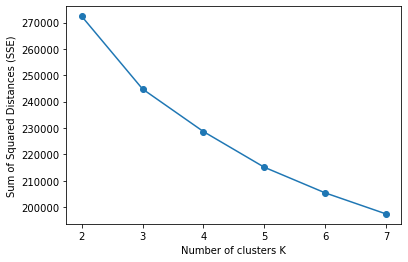

In [433]:
import matplotlib.pyplot as plt

plt.plot(range_n_clusters, SSE, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

N° of clusters = 2 -> Average silhouette coefficient:  0.30257988028075405
N° of clusters = 3 -> Average silhouette coefficient:  0.15875513830774735
N° of clusters = 4 -> Average silhouette coefficient:  0.15978370142900364
N° of clusters = 5 -> Average silhouette coefficient:  0.16609114317293888
N° of clusters = 6 -> Average silhouette coefficient:  0.13287927406978073
N° of clusters = 7 -> Average silhouette coefficient:  0.10565733152477061
N° of clusters = 8 -> Average silhouette coefficient:  0.09398606823680528


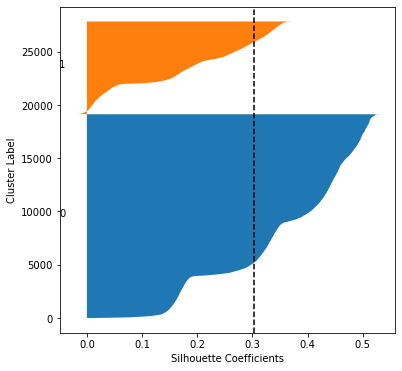

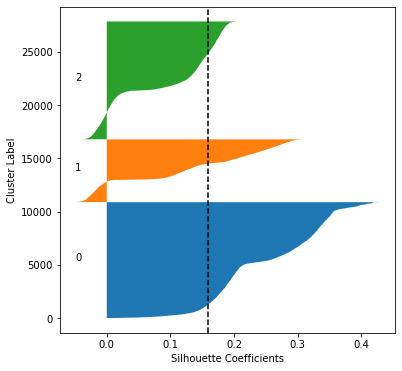

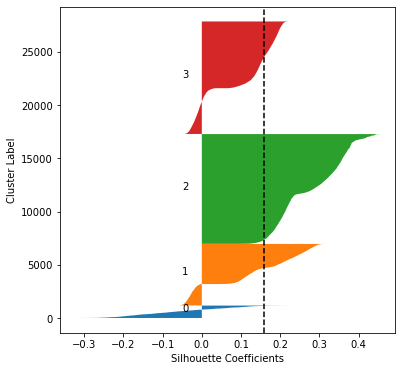

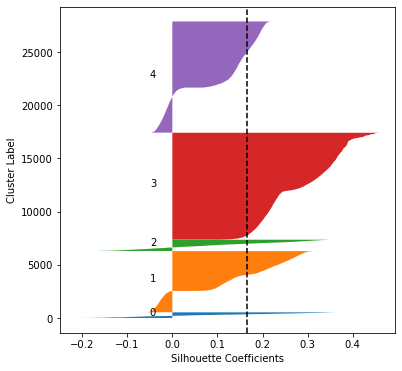

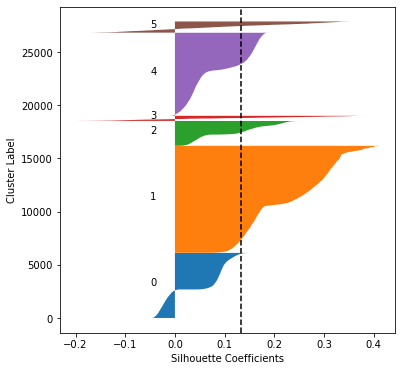

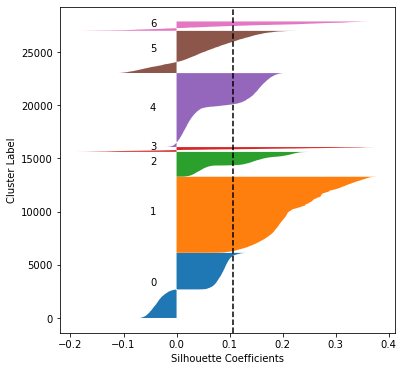

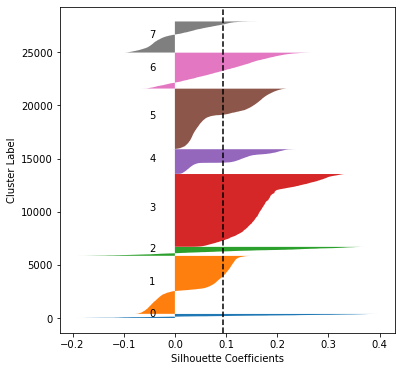

In [437]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
# Select the number of clusters by means of the silohuette coefficient
range_n_clusters = range(2,9)
for nclust in range_n_clusters:
    
    # Initialize K-means clustering
    km = KMeans(n_clusters=nclust,
                init='k-means++',
                n_init=10, 
                max_iter=100,
                random_state=0)
    
    # Generate K-means clustering, compute cluster centers and predict the cluster label for each example
    cluster_labels = km.fit_predict(X)
    cluster_labels_set = np.unique(cluster_labels)
    
    # Compute the average silhouette coefficient
    silhouette_avg_coeff = silhouette_score(X, cluster_labels)
    print("N° of clusters =", nclust, "-> Average silhouette coefficient: ", silhouette_avg_coeff)
    
    # Compute the silhouette coefficient for each example
    silhouette_example_coeff = silhouette_samples(X, cluster_labels)
    
    # For the examples belonging to each cluster plot the silhouette coefficient
    fig = plt.figure(nclust) 
    fig.set_size_inches(6,6)
    ax1 = fig.add_subplot()
    
    y_lower = 0
    for i in cluster_labels_set:
        # Aggregate and sort the silhouette coefficients for the examples belonging to the cluster
        cluster_i_silhouette_coeff = silhouette_example_coeff[cluster_labels==i]
        cluster_i_silhouette_coeff.sort()
        y_upper = y_lower + cluster_i_silhouette_coeff.shape[0]
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_silhouette_coeff)
        ax1.text(-0.05, y_lower + 0.5 * cluster_i_silhouette_coeff.shape[0], str(i))
        y_lower = y_upper + 10
    
    # Enrich the silhouette plot
    ax1.axvline(x=silhouette_avg_coeff, color="black", linestyle="--")
    ax1.set_xlabel("Silhouette Coefficients")
    ax1.set_ylabel("Cluster Label")

In [440]:
n_cluster = [2,3,5]

for n in n_cluster:
    # Generate the final K-means clustering model
    km = KMeans(n_clusters=n,
                init='k-means++',
                n_init=10, 
                max_iter=100,
                random_state=0)
    cluster_labels = km.fit_predict(X)
    data_numeric['Cluster_Label_{}'.format(n)] = cluster_labels

In [441]:
data_numeric

,VAERS_ID,AGE_YRS,DIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,NUMDAYS,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,MULTIPLE_VAX,Headache,Chills,Pyrexia,Fatigue,Pain,Nausea,Dizziness,Pain in extremity,Myalgia,Injection site pain,Injection site erythema,Dyspnoea,Arthralgia,Pruritus,Injection site swelling,Death,Rash,Asthenia,Vomiting,SARS-CoV-2 test positive,Injection site pruritus,Erythema,Malaise,Diarrhoea,COVID-19,Injection site warmth,Paraesthesia,Urticaria,Hypoaesthesia,Cough,Lymphadenopathy,Feeling abnormal,Hyperhidrosis,Chest discomfort,Heart rate increased,Chest pain,SARS-CoV-2 test,Flushing,Palpitations,Peripheral swelling,Condition aggravated,SARS-CoV-2 test negative,Feeling hot,Injection site rash,Vaccination site pain,Blood test,Back pain,Decreased appetite,Blood pressure increased,Electrocardiogram,Oropharyngeal pain,Swelling,Tachycardia,Paraesthesia oral,Body temperature increased,Tremor,Neck pain,Skin warm,Body temperature,Computerised tomogram,Throat tightness,Hypertension,Injection site induration,Rash erythematous,Facial paralysis,Syncope,Laboratory test,Loss of consciousness,Mobility decreased,Anxiety,Throat irritation,Full blood count,Abdominal pain,Fall,Chest X-ray,Impaired work ability,Influenza like illness,Muscular weakness,Rash pruritic,Hypoaesthesia oral,Unresponsive to stimuli,Confusional state,Swelling face,Lethargy,Cerebrovascular accident,Immediate post-injection reaction,Feeling cold,Dysphagia,Abdominal pain upper,Anaphylactic reaction,Migraine,Lip swelling,Injection site reaction,Swollen tongue,Gait disturbance,Axillary pain,Burning sensation,Electrocardiogram normal,Limb discomfort,Musculoskeletal stiffness,Magnetic resonance imaging,Metabolic function test,Pharyngeal swelling,Dysgeusia,Insomnia,Lymph node pain,Abdominal discomfort,Nasal congestion,Rhinorrhoea,Hypotension,No adverse event,Tenderness,Chest X-ray normal,Hypersensitivity,Ageusia,Atrial fibrillation,Sleep disorder,Heart rate,Vertigo,Pneumonia,Vision blurred,Intensive care,Echocardiogram,Discomfort,Cardiac arrest,Muscle spasms,Exposure during pregnancy,Blood pressure measurement,Rash macular,Herpes zoster,Computerised tomogram head,Drug ineffective,Somnolence,Wheezing,Hot flush,Anosmia,Inappropriate schedule of product administration,Balance disorder,Oxygen saturation decreased,Injection site urticaria,Pallor,Cold sweat,Chest X-ray abnormal,Injected limb mobility decreased,Eye swelling,Product administered to patient of inappropriate age,Full blood count normal,Vaccination site swelling,Aphasia,Tinnitus,Seizure,Incorrect dose administered,Injection site mass,Dehydration,Blood glucose increased,Respiratory tract congestion,Induration,Ear pain,Hypoxia,Cellulitis,Gait inability,Laboratory test normal,Electrocardiogram abnormal,Dysarthria,Resuscitation,Blood creatinine increased,Blood test normal,Eye pain,Night sweats,Vaccination site erythema,Rash papular,Dysstasia,Dry mouth,Presyncope,Pulmonary embolism,Computerised tomogram normal,Platelet count decreased,Computerised tomogram head normal,Endotracheal intubation,Dysphonia,Unevaluable event,Exposure to SARS-CoV-2,Loss of personal independence in daily activities,Oedema peripheral,Disorientation,Myocardial infarction,Underdose,Contusion,Hypersomnia,Illness,Angiogram,Nasopharyngitis,Angioedema,Head discomfort,Computerised tomogram abnormal,Troponin increased,Product storage error,COVID-19 pneumonia,Sensation of foreign body,Joint range of motion decreased,Blood pressure decreased,Mental status changes,Hemiparesis,Nervousness,Blood glucose normal,Echocardiogram normal,Joint swelling,Eye pruritus,Influenza virus test negative,Muscle tightness,Retching,Speech disorder,Injection site bruising,Vaccination site warmth,Visual impairment,Urinary tract infection,X-ray,Peripheral coldness,Pain in jaw,Ear discomfort,Aspartate aminotransferase increased,Acute kidney injury,Epistaxis,Magnetic resonance imaging brain,Product preparation issue,C-reactive protein increased,Deep vein thrombosis,Pulse ab

In [442]:
data_numeric.drop(columns=['STD_AGE_YRS', 'STD_NUMDAYS','STD_HOSPDAYS']).to_csv("4_1_vaers_k_means_clusters_scaling.csv", index=False)